In [99]:
import pandas as pd
import matplotlib.pyplot as plt



In [112]:
df = pd.read_csv("laptops.csv", header = 0)

In [113]:
df[['Manufacturer']].value_counts()

Manufacturer
HP              95
Lenovo          71
Dell            65
Asus            35
Acer            20
MSI             20
Toshiba          9
Apple            4
Razer            2
Vero             2
Fujitsu          1
Samsung          1
Name: count, dtype: int64

In [115]:
dropings = ['Vero','Razer','Fujitsu', 'Samsung']
# the method .drop() delete rows of my dataset and it takes the indexes that i want to drop, i select the columns where i  filtrated the data using the the method .isin() that takes a list of names that i want to drop, the function .index() takes the index that the function .drop() will take to delete the data, inplace = true will drop the data in the original dataset
df.drop(df[df['Manufacturer'].isin(dropings)].index, inplace= True)
df.reset_index(drop=True, inplace=True)


In [117]:
df[['Manufacturer', 'Price']]

,Manufacturer,Price
0,HP,5148468.0
1,Asus,15552108.0
2,Dell,11550708.0
3,Toshiba,10625940.0
4,Lenovo,4881708.0
...,...,...
314,Lenovo,5673096.0
315,Lenovo,13329108.0
316,Lenovo,2036268.0
317,HP,6793488.0


In [116]:
Asia = ['Lenovo', 'Asus', 'Acer','MSI', 'Toshiba']
America =['HP', 'Dell', 'Apple']

df['Category'] = df['Manufacturer'].apply(lambda x: 'Asia' if x in Asia else 'America')
df_new = df[['Manufacturer', 'Category', 'Price']]
df_new

,Manufacturer,Category,Price
0,HP,America,5148468.0
1,Asus,Asia,15552108.0
2,Dell,America,11550708.0
3,Toshiba,Asia,10625940.0
4,Lenovo,Asia,4881708.0
...,...,...,...
314,Lenovo,Asia,5673096.0
315,Lenovo,Asia,13329108.0
316,Lenovo,Asia,2036268.0
317,HP,America,6793488.0


In [139]:
df[['Manufacturer']].value_counts()

Manufacturer
HP              95
Lenovo          71
Dell            65
Asus            35
Acer            20
MSI             20
Toshiba          9
Apple            4
Name: count, dtype: int64

In [138]:
df_new['Manufacturer'].mode()

0    HP
Name: Manufacturer, dtype: object

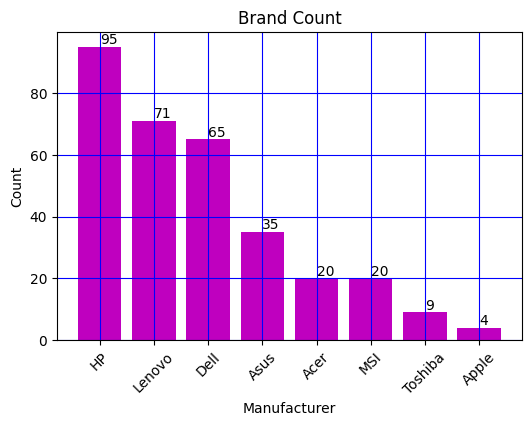

In [121]:
manufacturer_counts = df_new['Manufacturer'].value_counts()

plt.figure(figsize=(6, 4))
bars = plt.bar(manufacturer_counts.index, manufacturer_counts.values, color = 'm')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.title('Brand Count')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True, color = 'b')
plt.show()

In [71]:
df_new['Category'].value_counts()

Manufacturer  Category
HP            America     95
Lenovo        Asia        71
Dell          America     65
Asus          Asia        35
Acer          Asia        20
MSI           Asia        20
Toshiba       Asia         9
Apple         America      4
Name: count, dtype: int64

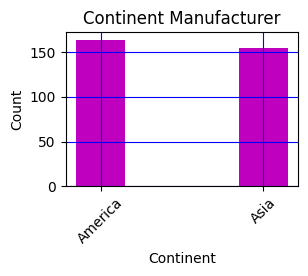

In [124]:
Categoryr_counts = df_new['Category'].value_counts()

plt.figure(figsize=(3, 2))
plt.bar(Categoryr_counts.index, Categoryr_counts.values, color = 'm', width= 0.3)
plt.title('Continent Manufacturer')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True, color = 'b')
plt.show()

In [92]:
df_new.sort_values(by = 'Price', ascending= True, inplace = True)
df_new['Price'].mean()

C:\Users\HOME\AppData\Local\Temp\ipykernel_8232\3306218875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.sort_values(by = 'Price', ascending= True, inplace = True)


9903706.115360502

In [132]:
df_new['Price'].mean()

9903706.115360502

In [133]:
df_new['Price'].median()

8980030.8

In [137]:
from scipy import stats

data = df['Price']

#calculate 5% trimmed mean
stats.trim_mean(data, 0.05)

9523700.910311418

In [142]:
import numpy as np

Data = df['Price']

#Calculate the number of elements to trim 
#from each end (5% in this case)
trim_percentage = 0.05
trim_count = int(len(Data) * trim_percentage)
print('trim_count:', trim_count)

# Sort the values
sorted_values = np.sort(Data)

# Trim the data
trimmed_data = sorted_values[trim_count:-trim_count]

# Calculate the trimmed mean
trimmed_mean = np.mean(trimmed_data)

print("Trimmed Mean:", trimmed_mean)


trim_count: 15
Trimmed Mean: 9523700.910311418


In [143]:
df2 = pd.read_csv('gender&age.csv', header=0 )
df2

,Gender,Age
0,Male,3.0
1,Male,58.0
2,Female,8.0
3,Female,70.0
4,Male,14.0
...,...,...
43395,Female,10.0
43396,Female,56.0
43397,Female,82.0
43398,Male,40.0


In [148]:
df2[['Gender']].mode()

,Gender
0,Female


In [149]:
df2['Gender'].value_counts()

Gender
Female    25665
Male      17724
Other        11
Name: count, dtype: int64

In [150]:
df2['Age'].value_counts()

Age
51.00    738
52.00    721
53.00    701
78.00    698
50.00    694
        ... 
0.48      37
0.40      35
1.00      34
0.16      26
0.08      17
Name: count, Length: 104, dtype: int64

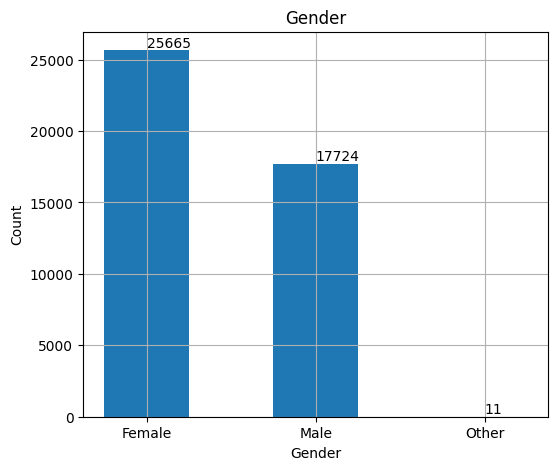

In [153]:
gender = df2['Gender'].value_counts()

plt.figure(figsize=(6, 5))
bars = plt.bar(gender.index, gender.values, width= 0.5)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.title('Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(True)
plt.show()


In [146]:
df2[['Age']].mode()

,Age
0,51.0


In [157]:
df2['Age'].mean()

42.21789400921659

In [171]:
df2['Age'].median()

44.0

In [156]:
import numpy as np

Data = df2['Age']

#Calculate the number of elements to trim 
#from each end (5% in this case)
trim_percentage = 0.05
trim_count = int(len(Data) * trim_percentage)
print('trim_count:', trim_count)

# Sort the values
sorted_values = np.sort(Data)

# Trim the data
trimmed_data = sorted_values[trim_count:-trim_count]

# Calculate the trimmed mean
trimmed_mean = np.mean(trimmed_data)

print("Trimmed Mean:", trimmed_mean)

trim_count: 2170
Trimmed Mean: 42.349667178699434


In [158]:
from scipy import stats

data = df2['Age']

#calculate 5% trimmed mean
stats.trim_mean(data, 0.05)

42.349667178699434

In [176]:
q1, q3= df2['Age'].quantile([ 0.25, 0.75]).values
Iqr=q3-q1
print('Q1: ', q1)
print('Q2: ', q3)
print('IQR: ', Iqr)


Q1:  24.0
Q2:  60.0
IQR:  36.0


In [179]:
lf=q1 - 1.5*Iqr
uf=q3 + 1.5*Iqr
print(lf)
print(uf)

-30.0
114.0


In [180]:
df2.describe()

,Age
count,43400.000000
mean,42.217894
std,22.519649
min,0.080000
25%,24.000000
50%,44.000000
75%,60.000000
max,82.000000


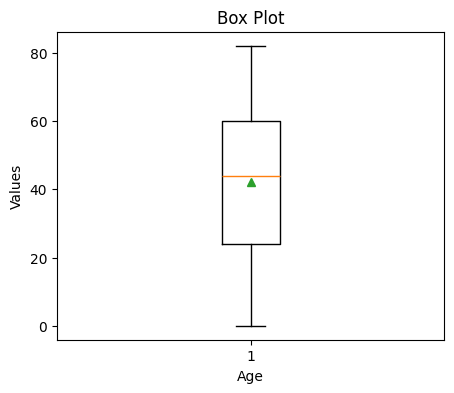

In [170]:

plt.figure(figsize=(5, 4))


plt.boxplot(df2['Age'], showfliers=True, whis=1.5, showmeans=True)

# Añadir etiquetas y título
plt.title('Box Plot')
plt.xlabel('Age')
plt.ylabel('Values')

# Mostrar el box plot
plt.show()